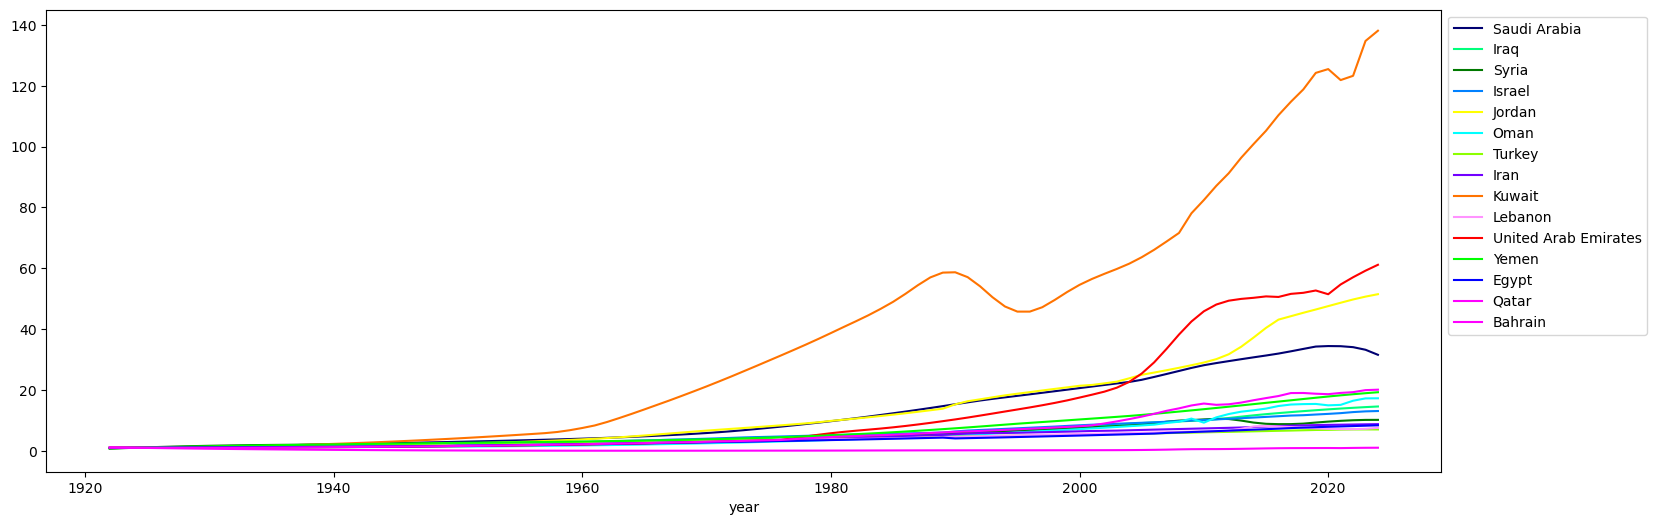

In [76]:

# Get the proportions countries have grown since 1924
fig, ax = plt.subplots(figsize=(18, 6))
df = interpolated_years_df / interpolated_years_df.loc[1924]
for country_name, node_color in hex_color_dict.items():
    if country_name == 'Ocean':
        continue
    df[country_name].plot(ax=ax, color=node_color, label=country_name)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [ ]:

df.plot?

In [46]:

import shapely

print([f'shapely.affinity.{fn}' for fn in dir(shapely.affinity) if not fn.startswith('_')])

['shapely.affinity.affine_transform', 'shapely.affinity.cos', 'shapely.affinity.interpret_origin', 'shapely.affinity.np', 'shapely.affinity.pi', 'shapely.affinity.rotate', 'shapely.affinity.scale', 'shapely.affinity.shapely', 'shapely.affinity.sin', 'shapely.affinity.skew', 'shapely.affinity.tan', 'shapely.affinity.translate']


In [52]:

shapely.affinity.interpret_origin()

Signature: shapely.affinity.interpret_origin(geom, origin, ndim)
Docstring:
Returns interpreted coordinate tuple for origin parameter.

This is a helper function for other transform functions.

The point of origin can be a keyword 'center' for the 2D bounding box
center, 'centroid' for the geometry's 2D centroid, a Point object or a
coordinate tuple (x0, y0, z0).
File:      c:\users\daveb\appdata\roaming\python\python312\site-packages\shapely\affinity.py
Type:      function

In [367]:

polygon.exterior.xy

(array('d', [53.0, 53.0, 52.0, 51.0, 51.0, 50.0, 49.0, 49.0, 48.0, 47.0, 46.0, 45.0, 44.0, 43.0, 43.0, 42.0, 42.0, 42.0, 43.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 48.0, 49.0, 49.0, 50.0, 51.0, 52.0, 52.0, 53.0, 53.0, 53.0]), array('d', [16.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 14.0, 14.0, 15.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 18.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 17.0, 16.0]))

In [37]:

scale?

Signature: scale(geom, xfact=1.0, yfact=1.0, zfact=1.0, origin='center')
Docstring:
Returns a scaled geometry, scaled by factors along each dimension.

The point of origin can be a keyword 'center' for the 2D bounding box
center (default), 'centroid' for the geometry's 2D centroid, a Point
object or a coordinate tuple (x0, y0, z0).

Negative scale factors will mirror or reflect coordinates.

The general 3D affine transformation matrix for scaling is:

    / xfact  0    0   xoff \
    |   0  yfact  0   yoff |
    |   0    0  zfact zoff |
    \   0    0    0     1  /

where the offsets are calculated from the origin Point(x0, y0, z0):

    xoff = x0 - x0 * xfact
    yoff = y0 - y0 * yfact
    zoff = z0 - z0 * zfact
File:      c:\users\daveb\appdata\roaming\python\python312\site-packages\shapely\affinity.py
Type:      function

In [94]:

# Introspect a Python module to discover available functions and classes programmatically
module_name = 'shapely'
import_call = '''
import shapely'''
sg_functions = nu.get_dir_tree(
   module_name, function_calls=[], contains_str='svg',
   import_call=import_call, recurse_modules=True, recurse_classes=True, level=4,
   verbose=False
)
sorted(sg_functions, key=lambda x: x[::-1])[:6]

[]


----

In [65]:

# Find the adjacencies using the polygon grid

# For each pair
country_pairs = combinations(country_names, 2)
for pair in country_pairs:
    country_name_from = pair[0]
    union_polygon_from = union_polygons_dict[country_name_from]
    country_name_to = pair[1]
    union_polygon_to = union_polygons_dict[country_name_to]

    # Check if they touch
    if union_polygon_from.touches(union_polygon_to):
        print(f'{country_name_from} and {country_name_to} border each other')

Bahrain and Iran border each other
Bahrain and Qatar border each other
Bahrain and Saudi Arabia border each other
Egypt and Israel border each other
Egypt and Jordan border each other
Egypt and Saudi Arabia border each other
Iran and Iraq border each other
Iran and Kuwait border each other
Iran and Oman border each other
Iran and Qatar border each other
Iran and Saudi Arabia border each other
Iran and Turkey border each other
Iran and United Arab Emirates border each other
Iraq and Jordan border each other
Iraq and Kuwait border each other
Iraq and Saudi Arabia border each other
Iraq and Syria border each other
Iraq and Turkey border each other
Israel and Jordan border each other
Israel and Lebanon border each other
Israel and Syria border each other
Jordan and Saudi Arabia border each other
Jordan and Syria border each other
Kuwait and Saudi Arabia border each other
Lebanon and Syria border each other
Oman and Saudi Arabia border each other
Oman and United Arab Emirates border each ot

In [ ]:

# Get the cmap farthest awawy from sky blue
from cycler import cycler
import numpy as np

def get_skyblue_distance():
    """
    Calculate the distance to sky blue of the centroids of the RGB values for all colormaps in matplotlib.

    Returns:
        dict: A dictionary where keys are colormap names and values are the distance from sky blue to the RGB centroids (r, g, b) for each colormap.
    """
    colormaps = plt.colormaps()  # Get all available colormaps
    centroids = {}

    for cmap_name in colormaps:
        # Get the colormap object
        cmap = plt.get_cmap(cmap_name)
        
        # Sample 256 colors from the colormap (standard resolution for colormaps)
        colors = cmap(np.linspace(0, 1, 256))
        
        # Extract the RGB values (ignoring the alpha channel if present)
        rgb_values = colors[:, :3]
        
        # Compute the centroid of the RGB values
        centroid = np.mean(rgb_values, axis=0)
        
        # Store the distance to sky blue in the dictionary
        centroids[cmap_name] = nu.color_distance_from('#87ceeb', tuple(centroid))

    return centroids

# Print the cmap farthest awawy from sky blue and its distance
centroids = get_skyblue_distance()
cmap_tuple = max([(cmap_name, distance) for cmap_name, distance in centroids.items()], key=lambda x: x[1])
print(cmap_tuple)

# Create a cycler out of that cmap
countries_list = sorted(merge_df.country_name.unique())
countries_list.remove('Ocean')
color_cycler = cycler('color', plt.get_cmap(cmap_tuple[0])(np.linspace(0, 1, len(countries_list))))
color_dict = {country_name: face_color_dict['color'] for country_name, face_color_dict in zip(countries_list, color_cycler())}
color_dict['Ocean'] = (0.529, 0.808, 0.922)

In [28]:

[f'geometry.{fn}' for fn in dir(geometry) if not fn.startswith('_')]

['geometry.almost_equals', 'geometry.area', 'geometry.boundary', 'geometry.bounds', 'geometry.buffer', 'geometry.centroid', 'geometry.contains', 'geometry.contains_properly', 'geometry.convex_hull', 'geometry.coords', 'geometry.covered_by', 'geometry.covers', 'geometry.crosses', 'geometry.difference', 'geometry.disjoint', 'geometry.distance', 'geometry.dwithin', 'geometry.envelope', 'geometry.equals', 'geometry.equals_exact', 'geometry.geom_type', 'geometry.geometryType', 'geometry.geoms', 'geometry.has_z', 'geometry.hausdorff_distance', 'geometry.interpolate', 'geometry.intersection', 'geometry.intersects', 'geometry.is_closed', 'geometry.is_empty', 'geometry.is_ring', 'geometry.is_simple', 'geometry.is_valid', 'geometry.length', 'geometry.line_interpolate_point', 'geometry.line_locate_point', 'geometry.minimum_clearance', 'geometry.minimum_rotated_rectangle', 'geometry.normalize', 'geometry.oriented_envelope', 'geometry.overlaps', 'geometry.point_on_surface', 'geometry.project', 'geo

In [27]:

[f'geom.{fn}' for fn in dir(geom) if not fn.startswith('_')]

['geom.almost_equals', 'geom.area', 'geom.boundary', 'geom.bounds', 'geom.buffer', 'geom.centroid', 'geom.contains', 'geom.contains_properly', 'geom.convex_hull', 'geom.coords', 'geom.covered_by', 'geom.covers', 'geom.crosses', 'geom.difference', 'geom.disjoint', 'geom.distance', 'geom.dwithin', 'geom.envelope', 'geom.equals', 'geom.equals_exact', 'geom.exterior', 'geom.from_bounds', 'geom.geom_type', 'geom.geometryType', 'geom.has_z', 'geom.hausdorff_distance', 'geom.interiors', 'geom.interpolate', 'geom.intersection', 'geom.intersects', 'geom.is_closed', 'geom.is_empty', 'geom.is_ring', 'geom.is_simple', 'geom.is_valid', 'geom.length', 'geom.line_interpolate_point', 'geom.line_locate_point', 'geom.minimum_clearance', 'geom.minimum_rotated_rectangle', 'geom.normalize', 'geom.oriented_envelope', 'geom.overlaps', 'geom.point_on_surface', 'geom.project', 'geom.relate', 'geom.relate_pattern', 'geom.representative_point', 'geom.reverse', 'geom.segmentize', 'geom.simplify', 'geom.svg', 'geo

In [141]:

print()
for (country_name, _, _) in country_areas:
    mask_series = countries_df.NAME_EN.isin([country_name])
    for (country_name, geometry), df in countries_df[mask_series].groupby(['NAME_EN', 'geometry']):
        bounds_tuple = geometry.bounds
            
        # Bounds Breakdown:
        minx = bounds_tuple[0]
        maxx = bounds_tuple[2]
        
        # Rectangle Parameters:
        width = maxx - minx

        print(country_name, f'if len(country_name) == {len(country_name)} and width == {width}: fontsize = 46')


Saudi Arabia if len(country_name) == 12 and width == 21.06480021899995: fontsize = 46
Iran if len(country_name) == 4 and width == 19.304764810999927: fontsize = 46
Turkey if len(country_name) == 6 and width == 19.143733518000033: fontsize = 46
Egypt if len(country_name) == 5 and width == 12.210837802999947: fontsize = 46
Yemen if len(country_name) == 5 and width == 11.99454752600002: fontsize = 46
Iraq if len(country_name) == 4 and width == 9.784744052999997: fontsize = 46
Oman if len(country_name) == 4 and width == 7.865959464999946: fontsize = 46
Syria if len(country_name) == 5 and width == 6.653786220999962: fontsize = 46
Jordan if len(country_name) == 6 and width == 4.3426140282045935: fontsize = 46
United Arab Emirates if len(country_name) == 20 and width == 4.8142903650000335: fontsize = 46
Israel if len(country_name) == 6 and width == 1.6397216930000695: fontsize = 46
Kuwait if len(country_name) == 6 and width == 1.9003454770000872: fontsize = 46
Lebanon if len(country_name) ==

In [151]:

def model_func(length, width, a, b, c, d, e):
    return np.maximum(a * length**2 + b * width**2 + c * length * width + d * length + e * width, 1)

In [143]:

# Data for curve fit
lengths = np.array([4, 6, 4, 5, 5, 12, 4, 5, 6, 6, 6, 20, 7, 5, 7])  # Lengths of country names
widths = np.array([19.304764810999927, 19.143733518000033, 9.784744052999997, 
                   12.210837802999947, 11.99454752600002, 21.06480021899995, 
                   7.865959464999946, 6.653786220999962, 4.3426140282045935, 
                   1.6397216930000695, 1.9003454770000872, 4.8142903650000335, 
                   1.5044812079999588, 0.8655598960000361, 0.43934560475753415])  # Widths in pixels
font_sizes = np.array([140, 84, 78, 62, 52, 46, 36, 36, 18, 8, 8, 6, 5, 4, 1])  # Font sizes

In [152]:

from scipy.optimize import curve_fit

# Fit the model to the data
popt, pcov = curve_fit(lambda xy, a, b, c, d, e: model_func(xy[0], xy[1], a, b, c, d, e), 
                       (lengths, widths), font_sizes, 
                       p0=[1, 1, 1, 1, 1])  # Initial guesses for a, b, c, d, e

In [153]:

a, b, c, d, e = popt
print(f"Fitted parameters: a={a}, b={b}, c={c}, d={d}, e={e}")

Fitted parameters: a=0.113248121509901, b=0.07960917897969728, c=-0.6521619640285813, d=-0.7374059853038561, e=7.725629637316294


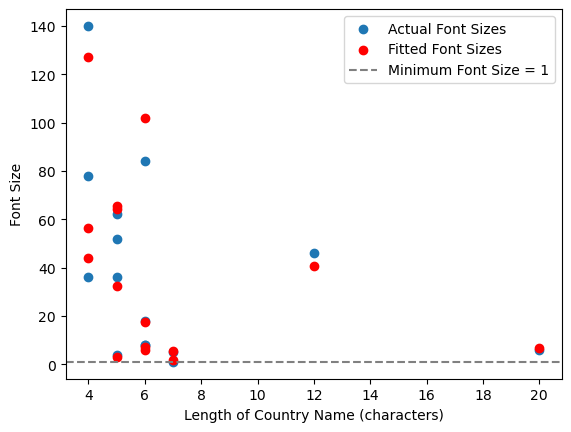

In [154]:

# Predict font sizes
predicted_font_sizes = model_func(lengths, widths, a, b, c, d, e)

# Visualize the results
plt.scatter(lengths, font_sizes, label='Actual Font Sizes')
plt.scatter(lengths, predicted_font_sizes, label='Fitted Font Sizes', color='red')
plt.xlabel('Length of Country Name (characters)')
plt.ylabel('Font Size')
plt.axhline(y=1, color='gray', linestyle='--', label='Minimum Font Size = 1')
plt.legend()
plt.show()

In [ ]:

iraq_dict = nu.get_regexed_dataframe(df, columns_list, country_pattern).dropna(how='all', axis='columns').T.to_dict()[89]

In [46]:

import collections

# Get the country name counts in the data frame columns
columns_sequence = []
for country_name in country_names:
    country_pattern = re.compile(r'\b' + country_name + r'\b')
    columns_sequence.extend(nu.get_regexed_columns(countries_df, country_pattern))
columns_count = collections.Counter(columns_sequence)

# Get the columns that have all the country names
name_columns = []
for cn in [k for k, v in columns_count.items() if v == len(country_names)]:
    df = nu.check_for_typos(country_names, countries_df[cn].unique())
    mask_series = (df.max_similarity < 1.0)
    if mask_series.any():
        display(df[mask_series])
    else:
        name_columns.append(cn)

# Display the column names
name_columns

['ADMIN', 'GEOUNIT', 'SUBUNIT', 'NAME', 'NAME_LONG', 'BRK_NAME', 'NAME_EN']

In [ ]:

df.map?

In [9]:

import glob

bad_file_endings = []
paths_list = [osp.abspath(f) for f in glob.glob('../data/*/ne_10m_admin_0_countries.*', recursive=True)]
formats = []
for file_path in paths_list:
    file_ending = file_path.split('.')[-1].upper()
    try:
        df = gpd.read_file(file_path)
        formats.append(file_ending)
    except Exception as e:
        # print(f"{e.__class__.__name__} error attempting to open {file_ending} in geopandas: {e}")
        print(e)
formats

'C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\data\cpg\ne_10m_admin_0_countries.cpg' not recognized as being in a supported file format. It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.
'C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\data\html\ne_10m_admin_0_countries.README.html' not recognized as being in a supported file format. It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.
'C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\data\prj\ne_10m_admin_0_countries.prj' not recognized as being in a supported file format. It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.
Unable to open C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\data\shp\ne_10m_admin_0_countries.shx or C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\data\shp\ne_10m_admin_0_coun

['DBF', 'ZIP']

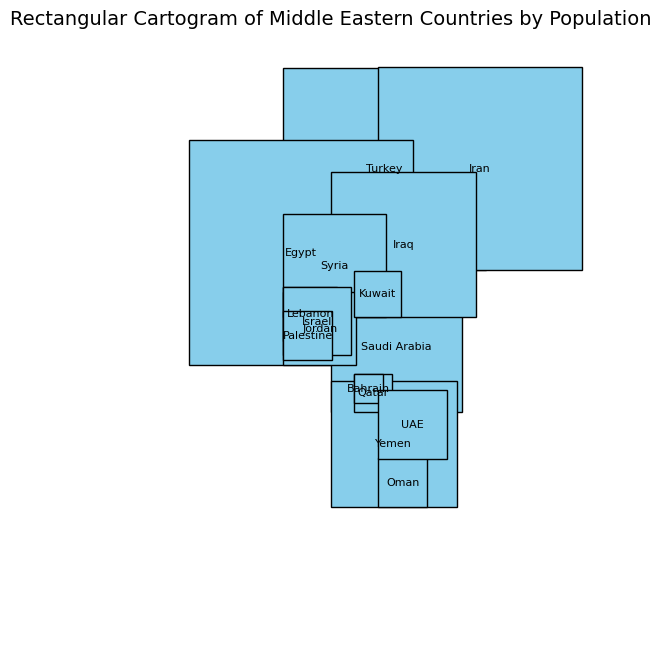

In [9]:

# Example population data for Middle Eastern countries
population_data = {
    "Turkey": 85000000,
    "Iran": 86000000,
    "Egypt": 105000000,
    "Saudi Arabia": 36000000,
    "Iraq": 44000000,
    "Yemen": 33000000,
    "Syria": 22000000,
    "Jordan": 11000000,
    "Lebanon": 6000000,
    "Israel": 9600000,
    "Palestine": 5000000,
    "Oman": 5000000,
    "Kuwait": 4500000,
    "Qatar": 3000000,
    "Bahrain": 1700000,
    "UAE": 10000000,
}

# Normalize population data for rectangle sizes
total_population = sum(population_data.values())
normalized_data = {k: v / total_population for k, v in population_data.items()}

# Define approximate positions for each country (manually adjusted)
positions = {
    "Turkey": (5, 8),
    "Iran": (7, 8),
    "Egypt": (3, 6),
    "Saudi Arabia": (6, 5),
    "Iraq": (6, 7),
    "Yemen": (6, 3),
    "Syria": (5, 7),
    "Jordan": (5, 6),
    "Lebanon": (5, 6.5),
    "Israel": (5, 6.2),
    "Palestine": (5, 6.1),
    "Oman": (7, 3),
    "Kuwait": (6.5, 7),
    "Qatar": (6.5, 5),
    "Bahrain": (6.5, 5.2),
    "UAE": (7, 4),
}


for country, norm_pop in normalized_data.items():
    x, y = positions[country]  # Get the position
    size = norm_pop * 100  # Scale size based on population
    width = size ** 0.5  # Width of the rectangle
    height = size ** 0.5  # Height of the rectangle

    # Draw the rectangle
    rect = patches.Rectangle((x, y), width, height, edgecolor="black", facecolor="skyblue")
    ax.add_patch(rect)

    # Add country name
    ax.text(x + width / 2, y + height / 2, country, ha="center", va="center", fontsize=8)

In [ ]:

import geopandas as gpd
from matplotlib.patches import Rectangle

# Example population data for Middle Eastern countries (replace with actual data)
population_data = {
    "Turkey": 85000000,
    "Iran": 86000000,
    "Egypt": 105000000,
    "Saudi Arabia": 36000000,
    "Iraq": 44000000,
    "Yemen": 33000000,
    "Syria": 22000000,
    "Jordan": 11000000,
    "Lebanon": 6000000,
    "Israel": 9600000,
    "Palestine": 5000000,
    "Oman": 5000000,
    "Kuwait": 4500000,
    "Qatar": 3000000,
    "Bahrain": 1700000,
    "UAE": 10000000,
}

# Normalize population data for rectangle sizes
total_population = sum(population_data.values())
normalized_data = {k: v / total_population for k, v in population_data.items()}

# Load geographic data for Middle Eastern countries (replace with actual shapefile or GeoJSON)
# Example: 'middle_east.geojson' should contain country boundaries
geo_data = gpd.read_file("middle_east.geojson")

# Create a plot
fig, ax = plt.subplots(figsize=(12, 10))

# Iterate through countries and draw rectangles
for _, row in geo_data.iterrows():
    country_name = row["name"]  # Replace with the column name for country names in your GeoJSON
    if country_name in normalized_data:
        # Get the centroid of the country for positioning
        centroid = row.geometry.centroid
        x, y = centroid.x, centroid.y

        # Scale the rectangle size based on population
        size = normalized_data[country_name] * 100  # Adjust scaling factor as needed
        width = size
        height = size / 2  # Adjust aspect ratio as needed

        # Draw the rectangle
        rect = Rectangle((x - width / 2, y - height / 2), width, height, edgecolor="black", facecolor="skyblue")
        ax.add_patch(rect)

        # Add country name as a label
        ax.text(x, y, country_name, ha="center", va="center", fontsize=8)

# Plot the original country boundaries for reference
geo_data.boundary.plot(ax=ax, color="gray", linewidth=0.5)

# Adjust plot limits and title
ax.set_xlim(geo_data.total_bounds[0], geo_data.total_bounds[2])
ax.set_ylim(geo_data.total_bounds[1], geo_data.total_bounds[3])
ax.set_aspect("equal")
plt.title("Rectangular Cartogram of Middle Eastern Countries by Population", fontsize=14)
plt.axis("off")
plt.show()

In [5]:

gpd.read_file?

Signature:
gpd.read_file(
    filename,
    bbox=None,
    mask=None,
    columns=None,
    rows=None,
    engine=None,
    **kwargs,
)
Docstring:
Returns a GeoDataFrame from a file or URL.

Parameters
----------
filename : str, path object or file-like object
    Either the absolute or relative path to the file or URL to
    be opened, or any object with a read() method (such as an open file
    or StringIO)
bbox : tuple | GeoDataFrame or GeoSeries | shapely Geometry, default None
    Filter features by given bounding box, GeoSeries, GeoDataFrame or a shapely
    geometry. With engine="fiona", CRS mis-matches are resolved if given a GeoSeries
    or GeoDataFrame. With engine="pyogrio", bbox must be in the same CRS as the
    dataset. Tuple is (minx, miny, maxx, maxy) to match the bounds property of
    shapely geometry objects. Cannot be used with mask.
mask : dict | GeoDataFrame or GeoSeries | shapely Geometry, default None
    Filter for features that intersect with the given dict-l

In [11]:

file_path = osp.abspath(osp.join(nu.data_folder, 'dbf', 'ne_10m_admin_0_countries.dbf'))
df = gpd.read_file(file_path)
country_name = 'Iraq'
country_pattern = re.compile(r'\b' + country_name + r'\b')
columns_list = nu.get_regexed_columns(df, country_pattern)
nu.get_regexed_dataframe(df, columns_list, country_pattern).dropna(how='all', axis='columns').T.to_dict()[89]

{'featurecla': 'Admin-0 country', 'scalerank': 0, 'LABELRANK': 3, 'SOVEREIGNT': 'Iraq', 'SOV_A3': 'IRQ', 'ADM0_DIF': 0, 'LEVEL': 2, 'TYPE': 'Sovereign country', 'TLC': '1', 'ADMIN': 'Iraq', 'ADM0_A3': 'IRQ', 'GEOU_DIF': 0, 'GEOUNIT': 'Iraq', 'GU_A3': 'IRQ', 'SU_DIF': 0, 'SUBUNIT': 'Iraq', 'SU_A3': 'IRQ', 'BRK_DIFF': 0, 'NAME': 'Iraq', 'NAME_LONG': 'Iraq', 'BRK_A3': 'IRQ', 'BRK_NAME': 'Iraq', 'ABBREV': 'Iraq', 'POSTAL': 'IRQ', 'FORMAL_EN': 'Republic of Iraq', 'NAME_CIAWF': 'Iraq', 'NAME_SORT': 'Iraq', 'MAPCOLOR7': 1, 'MAPCOLOR8': 4, 'MAPCOLOR9': 3, 'MAPCOLOR13': 1, 'POP_EST': 39309783.0, 'POP_RANK': 15, 'POP_YEAR': 2019, 'GDP_MD': 234094, 'GDP_YEAR': 2019, 'ECONOMY': '6. Developing region', 'INCOME_GRP': '4. Lower middle income', 'FIPS_10': 'IZ', 'ISO_A2': 'IQ', 'ISO_A2_EH': 'IQ', 'ISO_A3': 'IRQ', 'ISO_A3_EH': 'IRQ', 'ISO_N3': '368', 'ISO_N3_EH': '368', 'UN_A3': '368', 'WB_A2': 'IQ', 'WB_A3': 'IRQ', 'WOE_ID': 23424855, 'WOE_ID_EH': 23424855, 'WOE_NOTE': 'Exact WOE match as country', 'AD

In [219]:

print([f'adjacency_graph.{fn}' for fn in dir(adjacency_graph) if 'neigh' in fn])

['adjacency_graph.neighbors']


In [107]:

for edge_tuple in adjacency_graph.edges:
    shared_edge = union_polygons_dict[edge_tuple[0]].intersection(union_polygons_dict[edge_tuple[1]])
    if shared_edge.is_empty:
        print(edge_tuple, 'Empty')
    else:
        print(edge_tuple, shared_edge.geom_type)

('Egypt', 'Israel') MultiLineString
('Iran', 'Iraq') MultiLineString
('Iran', 'Turkey') MultiLineString
('Iraq', 'Jordan') LineString
('Iraq', 'Kuwait') MultiLineString
('Iraq', 'Saudi Arabia') MultiLineString
('Iraq', 'Syria') MultiLineString
('Iraq', 'Turkey') MultiLineString
('Israel', 'Jordan') MultiLineString
('Israel', 'Lebanon') LineString
('Israel', 'Syria') LineString
('Jordan', 'Saudi Arabia') MultiLineString
('Jordan', 'Syria') MultiLineString
('Kuwait', 'Saudi Arabia') MultiLineString
('Lebanon', 'Syria') MultiLineString
('Oman', 'Saudi Arabia') MultiLineString
('Oman', 'United Arab Emirates') MultiLineString
('Oman', 'Yemen') MultiLineString
('Qatar', 'Saudi Arabia') LineString
('Saudi Arabia', 'United Arab Emirates') MultiLineString
('Saudi Arabia', 'Yemen') MultiLineString
('Syria', 'Turkey') MultiLineString


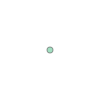

In [218]:

from shapely.affinity import translate

syria_shared_edge = union_polygons_dict[edge_tuple[0]].intersection(union_polygons_dict[edge_tuple[1]])
syria_shared_edge = translate(syria_shared_edge, xoff=13, yoff=-3)
turkey_shared_edge = union_polygons_dict[edge_tuple[0]].intersection(union_polygons_dict[edge_tuple[1]])

# Step 1: Extract coordinates from both MultiLineString objects
syria_coords = []
for line in syria_shared_edge.geoms:
    syria_coords.extend(line.coords)

turkey_coords = []
for line in turkey_shared_edge.geoms:
    turkey_coords.extend(line.coords)

# Step 2: Combine the coordinates to form a closed ring
# Start with Syria's coordinates, then add Turkey's coordinates in reverse order
combined_coords = syria_coords + turkey_coords[::-1]

# Ensure the ring is closed by repeating the first coordinate at the end
if combined_coords[0] != combined_coords[-1]:
    combined_coords.append(combined_coords[0])

# Step 3: Create a polygon from the combined coordinates
gap_polygon = Polygon(combined_coords)

gap_polygon.centroid

In [ ]:

    
    # Calculate the radius based on the maximum distance of points from the centroid
    x_diff = cluster_points[x_column] - centroid[0]
    y_diff = cluster_points[y_column] - centroid[1]
    distances = np.sqrt(x_diff**2 + y_diff**2)
    radius = distances.max() + 0.05

    # Create a circle around the centroid
    circle = Circle(
        (centroid[0], centroid[1]),
        radius, color='gray', fill=False, linestyle='dashed', linewidth=2
    )
    ax.add_patch(circle)

In [3]:

if nu.pickle_exists('gdp_by_working_age_adults_df'):
    gdp_by_working_age_adults_df = nu.load_object('gdp_by_working_age_adults_df')
else:
    gdp_by_working_age_adults_df = gdp_by_country_df.merge(waa_df, on=sorted(set(gdp_by_country_df.columns).intersection(set(waa_df.columns))))
    for cn in ['Population', 'IMF Forecast']: gdp_by_working_age_adults_df[cn] = pd.to_numeric(gdp_by_working_age_adults_df[cn], errors='coerce', downcast='integer')
    gdp_by_working_age_adults_df['gdp_by_working_age_adults'] = gdp_by_working_age_adults_df['IMF Forecast'] / gdp_by_working_age_adults_df.Population
    nu.store_objects(gdp_by_working_age_adults_df=gdp_by_working_age_adults_df)

In [5]:

import re

tla_regex = re.compile('^(CAN|FRA|DEU|ITA|JPN|ESP)$')
mask_series = gdp_by_working_age_adults_df.Country.isin([ssu.alpha3_to_country_dict[key] for key in ssu.alpha3_to_country_dict.keys() if tla_regex.fullmatch(key)]) | gdp_by_working_age_adults_df.GENC.isin(['UK', 'US'])
mask_series &= (gdp_by_working_age_adults_df.GROUP == population_group_type)
alpha3s_list = [ssu.country_to_alpha3_dict.get(country, country) for country in gdp_by_working_age_adults_df[mask_series].Country.unique()]
print(alpha3s_list)
alpha2s_list = gdp_by_working_age_adults_df[mask_series].GENC.unique().tolist()
print(alpha2s_list)
display(gdp_by_working_age_adults_df[mask_series])

['USA', 'DEU', 'JPN', 'FRA', 'ITA', 'CAN', 'ESP']
['US', 'DE', 'JP', 'FR', 'IT', 'CA', 'ES']


,Country,UN region,IMF Forecast,IMF Year,World Bank Estimate,World Bank Year,United Nations Estimate,United Nations Year,GENC,Year,GROUP,Population,% of Population,Male Population,% of Males,Female Population,% of Females,Sex ratio of the population,gdp_by_working_age_adults
2,United States,Americas,26949643,2023,25462700,2022,23315081,2021,US,1990,15 - 64,164229455,65.791044,81427735,66.901008,82801720,64.734841,0.983406,0.164098
6,United States,Americas,26949643,2023,25462700,2022,23315081,2021,US,1991,15 - 64,165924186,65.587623,82321188,66.702074,83602998,64.526059,0.984668,0.162421
10,United States,Americas,26949643,2023,25462700,2022,23315081,2021,US,1992,15 - 64,167953322,65.475247,83419230,66.603697,84534092,64.398548,0.986812,0.160459
14,United States,Americas,26949643,2023,25462700,2022,23315081,2021,US,1993,15 - 64,169920143,65.374371,84428892,66.494836,85491251,64.304283,0.987573,0.158602
18,United States,Americas,26949643,2023,25462700,2022,23315081,2021,US,1994,15 - 64,171992191,65.364999,85487122,66.476515,86505069,64.302487,0.988233,0.156691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,Spain,Europe,1582054,2023,1397509,2022,1427381,2021,ES,2019,15 - 64,30867581,65.939387,15465937,67.642717,15401644,64.313140,1.004174,0.051253
922,Spain,Europe,1582054,2023,1397509,2022,1427381,2021,ES,2020,15 - 64,31054455,66.015177,15559701,67.733798,15494754,64.374935,1.004192,0.050945
926,Spain,Europe,1582054,2023,1397509,2022,1427381,2021,ES,2021,15 - 64,31130899,66.090948,15598457,67.827954,15532442,64.433848,1.004250,0.050819
930,Spain,Europe,1582054,2023,1397509,2022,1427381,2021,ES,2022,15 - 64,31189755,66.131244,15629144,67.888660,15560611,64.455356,1.004404,0.050724


In [11]:

if nu.pickle_exists('gdp_by_country_df'):
    gdp_by_country_df = nu.load_object('gdp_by_country_df')
else:
    
    # wikipedia_url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
    html_path = '../data/html/gdp_usd_million_by_country.html'
    
    # Get the table dats frames list for the Wikipedia page
    table_dfs_list = nu.get_wiki_tables(osp.abspath(html_path), verbose=True)
    
    gdp_by_country_df = table_dfs_list[0].copy()
    gdp_by_country_df.columns = ['Country', 'UN region', 'IMF Forecast', 'IMF Year', 'World Bank Estimate', 'World Bank Year', 'United Nations Estimate', 'United Nations Year']
    nu.store_objects(gdp_by_country_df=gdp_by_country_df)
display(gdp_by_country_df)

,Country,UN region,IMF Forecast,IMF Year,World Bank Estimate,World Bank Year,United Nations Estimate,United Nations Year
0,World,—,104476432,2023,100562011,2022,96698005,2021
1,United States,Americas,26949643,2023,25462700,2022,23315081,2021
2,China,Asia,17700899,[n 1]2023,17963171,[n 3]2022,17734131,[n 1]2021
3,Germany,Europe,4429838,2023,4072192,2022,4259935,2021
4,Japan,Asia,4230862,2023,4231141,2022,4940878,2021
...,...,...,...,...,...,...,...,...
209,Palau,Oceania,267,2023,—,—,218,2021
210,Kiribati,Oceania,246,2023,223,2022,227,2021
211,Nauru,Oceania,150,2023,151,2022,155,2021
212,Montserrat,Americas,—,—,—,—,72,2021


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
alpha3,,,,,,,,,,,,,,,,,,,,,
CAN,0.040553,-0.168642,-0.653116,-0.448901,-0.548581,-0.693929,-0.760623,-0.524597,-0.695637,-0.562949,...,0.698859,0.351557,0.126533,0.252303,0.189849,0.205529,0.101837,0.438581,0.609922,0.396349
DEU,-0.343160,0.154382,0.462586,0.284188,0.303678,0.492606,0.477495,0.215548,0.288383,0.058412,...,0.461906,0.168026,0.150288,0.230501,0.323552,0.214398,0.346193,0.338647,0.185033,0.294663
ESP,-1.901234,-1.818440,-1.657796,-1.388771,-1.333491,-1.249729,-1.450294,-1.535110,-1.536889,-1.405800,...,-1.613354,-1.341109,-1.357701,-1.344011,-1.328380,-1.267004,-1.333216,-1.297807,-1.060469,-0.996080
FRA,0.383486,-0.011327,0.138795,-0.016388,-0.009645,0.094896,0.133773,-0.043861,0.078743,-0.090280,...,0.212035,-0.032207,-0.102562,-0.092345,-0.030517,-0.111305,-0.094466,-0.072666,-0.197245,-0.101080
ITA,-0.211010,-0.265148,-0.288814,-0.721908,-0.690055,-0.711658,-0.539813,-0.542811,-0.494164,-0.585868,...,-0.906773,-0.886730,-0.924215,-0.945699,-0.946439,-0.962863,-0.968579,-0.952884,-0.841739,-0.808274
JPN,1.090161,1.470675,1.505037,1.712235,1.754479,1.762121,1.565794,1.403483,1.044270,1.352643,...,-0.191174,-0.064560,0.335409,0.121859,0.003644,0.088439,0.184357,-0.201648,-0.545850,-0.689510
USA,0.941205,0.638501,0.493307,0.579545,0.523615,0.305693,0.573667,1.027348,1.315293,1.233842,...,1.338501,1.805022,1.772247,1.777392,1.788292,1.832806,1.763875,1.747778,1.850346,1.903932


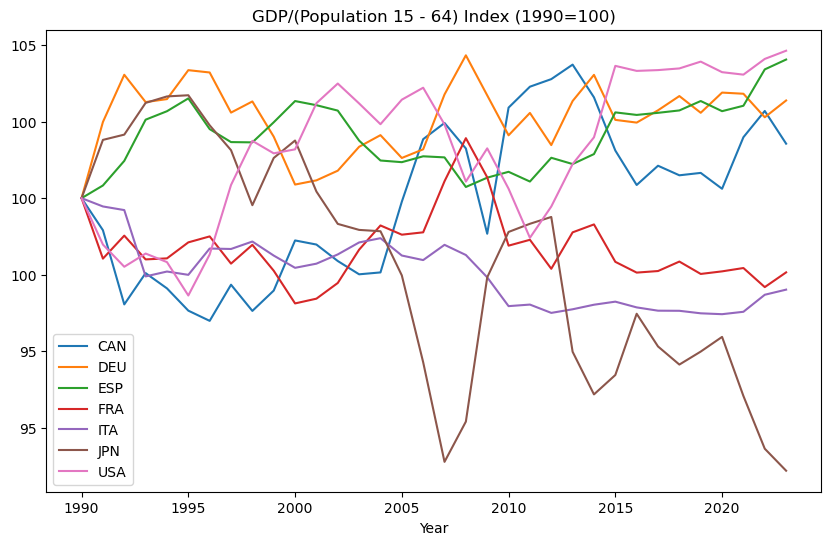

In [25]:

df = (gdp_by_waa_df-gdp_by_waa_df.mean())/gdp_by_waa_df.std()
display(df)
show_index_plot(df)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
alpha3,,,,,,,,,,,,,,,,,,,,,
CAN,0.649124,0.501593,0.317652,0.303085,0.254183,0.184538,0.228664,0.343877,0.294950,0.305553,...,0.783308,0.538015,0.474204,0.511409,0.487131,0.475040,0.463355,0.570133,0.573857,0.480146
DEU,0.520852,0.599803,0.670406,0.539489,0.530176,0.578493,0.639169,0.595747,0.639956,0.530811,...,0.703036,0.479680,0.481793,0.504425,0.530031,0.477901,0.542254,0.537320,0.427888,0.445082
ESP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FRA,0.763764,0.549422,0.568032,0.442561,0.428711,0.446445,0.525206,0.507471,0.566455,0.476907,...,0.618387,0.416036,0.401009,0.400995,0.416426,0.372829,0.399972,0.402268,0.296557,0.308619
ITA,0.565029,0.472252,0.432834,0.215047,0.208369,0.178651,0.301875,0.337679,0.365589,0.297245,...,0.239368,0.144425,0.138496,0.127607,0.122548,0.098116,0.117735,0.113253,0.075144,0.064760
JPN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.904977,1.000000,...,0.481792,0.405752,0.540939,0.469619,0.427387,0.437267,0.490000,0.359917,0.176795,0.105713
USA,0.950205,0.746991,0.680119,0.634735,0.601400,0.516434,0.671055,0.872002,1.000000,0.956932,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


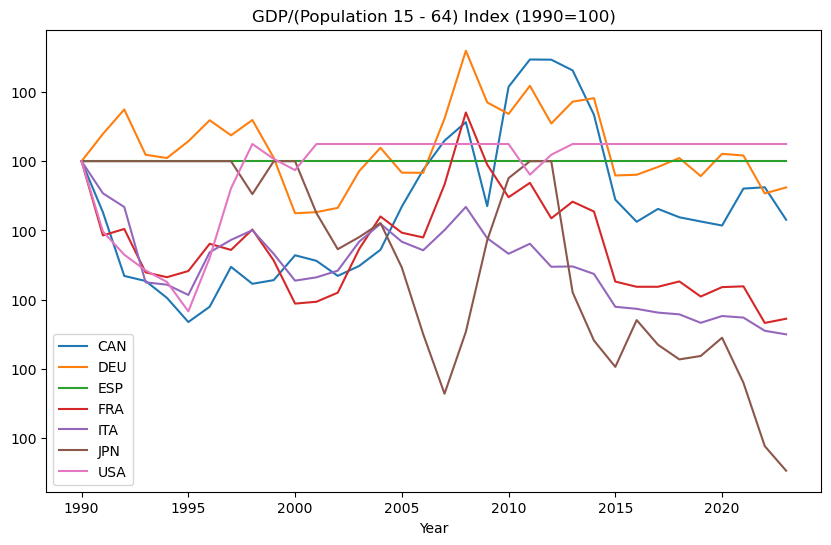

In [26]:

df = (gdp_by_waa_df-gdp_by_waa_df.min())/(gdp_by_waa_df.max()-gdp_by_waa_df.min())
display(df)
show_index_plot(df)

In [ ]:

ccode_str = ','.join(alpha2s_list)
for year in range(start_year, 2024):
    url = f'https://www.census.gov/data-tools/demo/idb/#/pop?COUNTRY_YEAR={year}&COUNTRY_YR_ANIM={year}&menu=popViz&CCODE_SINGLE=**&CCODE={ccode_str}&popPages=BYAGE&ageGroup=BR'
    print(url)

In [ ]:

import requests

url = f'https://www.imf.org/external/datamapper/api/v1/indicators'
value_obj = requests.get(f'{url}').json()
for indicator, description_dict in value_obj['indicators'].items():
    if indicator:
        label = description_dict['label']
        if label: label = label.strip()
        print(f'{indicator}: {label}')

In [ ]:

df = pd.concat(
    [pd.Series(china_cumuls_list, index=china_years_list), pd.Series(china_cumuls_list, index=china_years_list).diff(), pd.Series(china_cumuls_list, index=china_years_list).diff().diff()], axis='columns'
).rename(columns={0: 'china_cumuls_list', 1: 'china_cumuls_diff', 2: 'china_cumuls_diff_diff'})
mask_series = (df.china_cumuls_diff_diff > 0.0)
# display(df[mask_series])
mask_series = anthropogenic_disasters_df.Start.isin(df[mask_series].index) & (anthropogenic_disasters_df.percent_china > 0.0)# & (anthropogenic_disasters_df.End < 1945)
df = anthropogenic_disasters_df[mask_series].sort_values('Start')
display(df)
    label = row_series.Event
    x = row_series.End
    idx = china_years_list.index(x)
    y = china_cumuls_list[idx]
    print(f"('{label}', {x}, {y}),")

In [34]:

[f'table_soup.{fn}' for fn in dir(table_soup) if 'child' in fn.lower()]

['table_soup._lastRecursiveChild', 'table_soup.childGenerator', 'table_soup.children', 'table_soup.findChild', 'table_soup.findChildren', 'table_soup.recursiveChildGenerator', 'table_soup.replaceWithChildren', 'table_soup.replace_with_children']

In [30]:

table_soup = table_soups_list[0]
nations_list = []
for td_soup in table_soup.find_all('td', attrs={'align': 'left'}):
    nation_list = []
    for a_soup in td_soup.find_all('a', attrs={'title': True}):
        nation_list.append(a_soup.text.strip())
    for div_soup in td_soup.find_all('div', attrs={'class':'plainlist'}):
        for li_soup in div_soup.find_all('li'):
            nation_list.append(li_soup.text.strip())
    # if nations_list and (nations_list[-1] == 'United States'): raise
    if nation_list: nations_list.append(' '.join(nation_list))

# <tr><th colspan="9" style="text-align:center;background:#B0C4DE">
# <a href="/wiki/Central_Powers" title="Central Powers">Central Powers</a>
# </th></tr>
for th_soup in table_soup.find_all('th', attrs={'colspan': '9'}):
    nation_list = []
    for a_soup in th_soup.find_all('a', attrs={'title': True}):
        nation_list.append(a_soup.text.strip())
    if nation_list: nations_list.append(' '.join(nation_list))
nations_list

['Australia', 'Canada', 'India', 'New Zealand', 'Newfoundland', 'South Africa', 'United Kingdom', 'Sub-total British Empire', 'Belgium', 'France', 'Greece', 'Italy', 'Japan', 'Montenegro', 'Portugal', 'Romania', 'Russia', 'Serbia', 'United States', 'Total Allied Powers', 'Austria-Hungary', 'Bulgaria', 'Germany', 'Ottoman Empire', 'Total Central Powers', 'Denmark', 'Luxembourg', 'Norway', 'Persia', 'Sweden', 'Albania', 'Allies and co-belligerents of World War I', 'Central Powers']

In [65]:

wwi_casualties_df = tables_df_list[0].copy()
wwi_casualties_df.columns = [
    'Nation', 'Population (millions)', 'Combat deaths and missing in action (included in total military deaths)', 'Total military deaths (from all causes)',
    'Civilian deaths (military action and crimes against humanity)', 'Increase in civilian deaths (malnutrition and disease excluding Influenza pandemic)',
    'Total deaths', 'Deaths as % of population', 'Military wounded'
]
print(set([' '.join(nation.split(' ')[:-1]) for nation in wwi_casualties_df.Nation]) - set(nations_list))
print(len(wwi_casualties_df.Nation), len(nations_list))
for nation_raw, nation_soap in zip(wwi_casualties_df.Nation, nations_list[1:]):
    print(nation_raw, nation_soap)

{'TotalAllied', '.mw-parser-output .plainlist ol,.mw-parser-output .plainlist ul{line-height:inherit;list-style:none;margin:0;padding:0}.mw-parser-output .plainlist ol li,.mw-parser-output .plainlist ul li{margin-bottom:0}Sub-totalBritish', 'Central', 'TotalCentral', 'Grand', 'Neutral', 'United Kingdom|(and Colonies)'}
34 34
Australia b Australia
Canada d Canada
India g India
New Zealand l New Zealand
Newfoundland m Newfoundland
South Africa r South Africa
United Kingdom|(and Colonies) s United Kingdom
.mw-parser-output .plainlist ol,.mw-parser-output .plainlist ul{line-height:inherit;list-style:none;margin:0;padding:0}.mw-parser-output .plainlist ol li,.mw-parser-output .plainlist ul li{margin-bottom:0}Sub-totalBritish Empire Sub-total British Empire
Belgium c Belgium
France e France
Greece f Greece
Italy h Italy
Japan i Japan
Montenegro k Montenegro
Portugal n Portugal
Romania o Romania
Russia p Russia
Serbia q Serbia
United States t United States
TotalAllied Powers Total Allied Powe

In [78]:

mask_series = (anthropogenic_disasters_df.Event == 'Punic Wars')
display(anthropogenic_disasters_df[mask_series])
gme = int(anthropogenic_disasters_df.loc[mask_series, 'Geometric mean estimate'])
he = int(anthropogenic_disasters_df.loc[mask_series, 'Highest estimate'])
print(f'{gme*gme/he} ({humanize.intword(gme*gme/he)})')

,Event,Lowest estimate,Highest estimate,Geometric mean estimate,Location,Start,End,Duration,Notes
24,Punic Wars,1250000,1850000,1520691,Medi­terranean,-264,-146,118 years,"See also: Carthage, Roman Republic"


1250000.6040437839 (1.2 million)
